# Preliminaries

In [2]:
library(ggplot2)
library(dplyr)
library(GGally)
library(plotly)
library(gridExtra)

ERROR: Error in library(dplyr): there is no package called 'dplyr'


In [2]:
setwd('..')
path <- getwd()
setwd(paste(path, "/Results/PCA", sep = ""))
getwd()

[1] "C:/Users/tomas/Box Sync/Research/FacialSD/Results/PCA"

In [3]:
#Read data
coeffs   <- read.csv("coeffs.csv")
eigenvec <- read.csv("eigenvectors.csv", header=F)
head(coeffs)
head(eigenvec)

ID,Sex,Age,Height,Weight,PC1,PC2,PC3,PC4,PC5,...,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87
12001,Female,21,164.200,74.4,-2.749977,-0.04763979,1.43286769,1.9755295,-0.11449664,...,-0.04283027,-0.03996372,0.055315911,0.012673723,0.02750481,0.01829970,-0.055455985,-0.06052372,-0.064412487,0.003097291
12002,Male,19,162.400,78.6,-3.001070,0.10574822,0.67591792,2.1056061,1.19788202,...,0.01836775,0.08419655,-0.020682862,0.068841675,0.01168142,0.04005850,-0.063840719,-0.08960896,-0.031497687,-0.037211258
12004,Female,19,163.500,51.2,-0.939990,-1.44340059,1.28381042,0.5728486,-1.36779655,...,0.13137624,-0.06855137,0.055569259,-0.120875713,-0.06657466,-0.09529765,0.047979496,-0.02468192,0.122864748,-0.040017000
12005,Male,21,160.625,62.4,-2.595005,1.39772255,0.89392749,0.1308629,0.58543586,...,0.02645339,0.14154984,0.061478010,0.001784802,-0.04522543,0.03095158,-0.013071376,0.00393760,-0.038811805,-0.002309141
12006,Male,21,182.500,76.5,2.580508,-0.08551034,0.09491229,-0.1113793,1.32441015,...,0.03073430,-0.02157470,0.031584983,-0.028006567,0.03288916,0.03660303,0.006772009,-0.04127315,0.047567544,0.002878110
12007,Female,22,154.500,48.7,-1.539039,-1.32810730,2.00446630,-0.8950772,0.08616236,...,-0.07995918,0.01262985,-0.007124648,0.008231630,-0.05299271,-0.03545452,-0.017591984,0.01296477,0.001504371,0.045444447


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87
-0.01367200,0.0067927,0.0080599,-0.00054394,0.0019523,-0.00398910,-0.0087726,0.0042139,0.0048730,-0.0212310,...,-0.0032874,-0.00157740,-0.0079487,0.0087163,0.0070262,0.0037280,0.00019545,0.0038885,0.0104000,0.0243250
0.00051885,-0.0033394,0.0026778,0.00128540,-0.0030379,-0.01030300,0.0035671,-0.0034041,0.0040360,0.0033053,...,0.0069896,0.00589090,0.0142910,-0.0108840,0.0044794,0.0183560,0.00092992,-0.0079631,0.0110450,-0.0030406
-0.01285600,-0.0075972,-0.0098921,-0.00370950,0.0029924,0.00047301,-0.0151220,-0.0094850,0.0046434,-0.0108680,...,0.0079415,-0.01360500,-0.0277800,-0.0150330,0.0033585,-0.0045913,-0.00383260,0.0088568,0.0233670,-0.0196160
-0.01385900,0.0068568,0.0079126,-0.00017263,0.0022811,-0.00369990,-0.0086215,0.0041280,0.0041108,-0.0214350,...,-0.0025435,-0.00094072,-0.0067116,0.0085194,0.0070507,0.0030966,-0.00091916,0.0059066,0.0096272,0.0236430
0.00037599,-0.0034277,0.0025848,0.00134590,-0.0029950,-0.01026800,0.0032415,-0.0037007,0.0042340,0.0029755,...,0.0069373,0.00604760,0.0138060,-0.0109250,0.0048140,0.0178140,0.00161140,-0.0090971,0.0121070,-0.0029820
-0.01292700,-0.0076306,-0.0097583,-0.00374570,0.0030843,0.00071141,-0.0148960,-0.0097385,0.0042498,-0.0110710,...,0.0086126,-0.01341100,-0.0250740,-0.0142630,0.0029066,-0.0046231,-0.00312450,0.0092627,0.0236260,-0.0194480


## Data cleaning

In [6]:
#Remove no sex participants
coeffs = filter(coeffs, Sex == 'Female' | Sex == 'Male')
coeffs = droplevels(coeffs)

ERROR: Error in filter(coeffs, Sex == "Female" | Sex == "Male"): object 'Sex' not found


In [8]:
#Removed NAs from database
coeffs = na.omit(coeffs)

# Descriptive stats

In [9]:
summary(coeffs[,2:5])

     Sex            Age            Height          Weight      
 Female:3432   Min.   :15.00   Min.   :130.8   Min.   : 29.94  
 Male  :2135   1st Qu.:20.00   1st Qu.:162.3   1st Qu.: 58.97  
               Median :22.00   Median :168.2   Median : 67.99  
               Mean   :28.17   Mean   :169.2   Mean   : 70.56  
               3rd Qu.:30.00   3rd Qu.:176.0   3rd Qu.: 79.47  
               Max.   :91.00   Max.   :208.3   Max.   :171.09  

Warning message:
"Removed 41 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 347 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 360 rows containing non-finite values (stat_boxplot)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 41 rows containing non-finite values (stat_bin)."Warning message:
"Removed 41 rows containing non-finite values (stat_density)."Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
"Removed 349 rows containing missing values"Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
"Removed 362 rows containing missing values"Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
"Removed 41 rows containing missing values"Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
"Removed 41 rows containing missing values"`stat_bin()` using

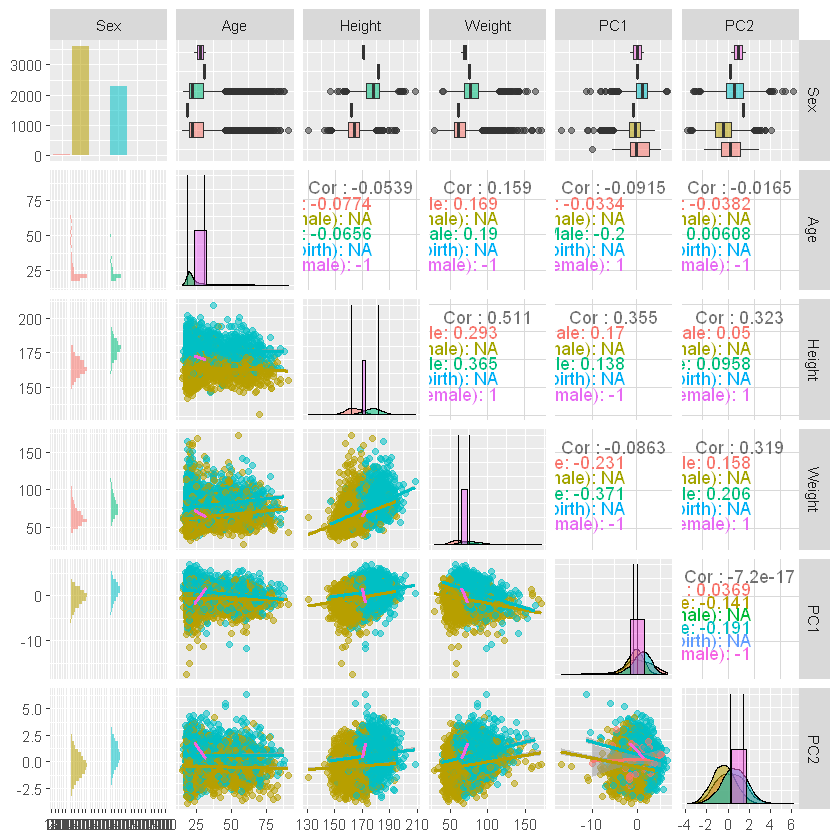

In [49]:
ggpairs(coeffs, columns = 2:7, ggplot2::aes(colour=Sex, alpha = 0.2), 
       lower = list(continuous = "smooth"))

In [10]:
conm <- colMeans(coeffs[coeffs$Sex == 'Male', 6:ncol(coeffs)])
conf <- colMeans(coeffs[coeffs$Sex == 'Female', 6:ncol(coeffs)])

In [11]:
consensus <- as.data.frame(t(data.frame(conm, conf)))
consensus

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87
conm,0.9642423,0.6279223,-0.16927554,0.019818224,0.3569083,-0.08224982,-0.1880506,-0.07766733,-0.10568504,0.09150120,...,0.003577043,0.0009855329,5.888722e-05,-0.002228046,0.0014160868,-0.0020883402,0.006652278,0.004668233,-0.0008344092,0.003005956
conf,-0.5605643,-0.3928491,0.08105478,0.002792051,-0.2416701,0.06433696,0.1097033,0.03640854,0.07268088,-0.05863345,...,-0.001749712,-0.0007240477,-3.681789e-04,0.001645342,-0.0003848936,0.0008640886,-0.004025702,-0.002768982,0.0005610164,-0.001512976


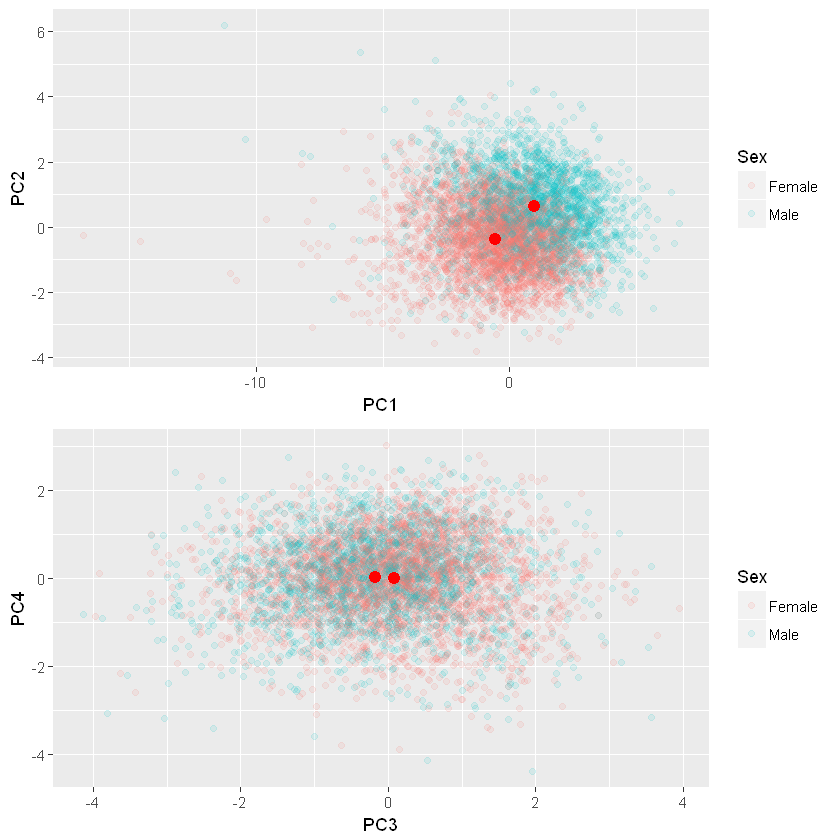

In [12]:
plot1 <- ggplot(coeffs, aes(PC1, PC2, colour=Sex)) + geom_point(alpha=0.1) + 
            geom_point(data = consensus[,1:2], aes(PC1, PC2), color="red", size=3)

plot2 <- ggplot(coeffs, aes(PC3, PC4, colour=Sex)) + geom_point(alpha=0.1) + 
            geom_point(data = consensus, aes(PC3, PC4), color="red", size=3)

grid.arrange(plot1, plot2)

# Facial SD (allometric and non-allometric)

In [13]:
totalSD <- consensus[2,] - consensus[1,]
totalSD

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87
conf,-1.524807,-1.020771,0.2503303,-0.01702617,-0.5985784,0.1465868,0.2977539,0.1140759,0.1783659,-0.1501347,...,-0.005326755,-0.001709581,-0.0004270661,0.003873388,-0.00180098,0.002952429,-0.01067798,-0.007437215,0.001395426,-0.004518932


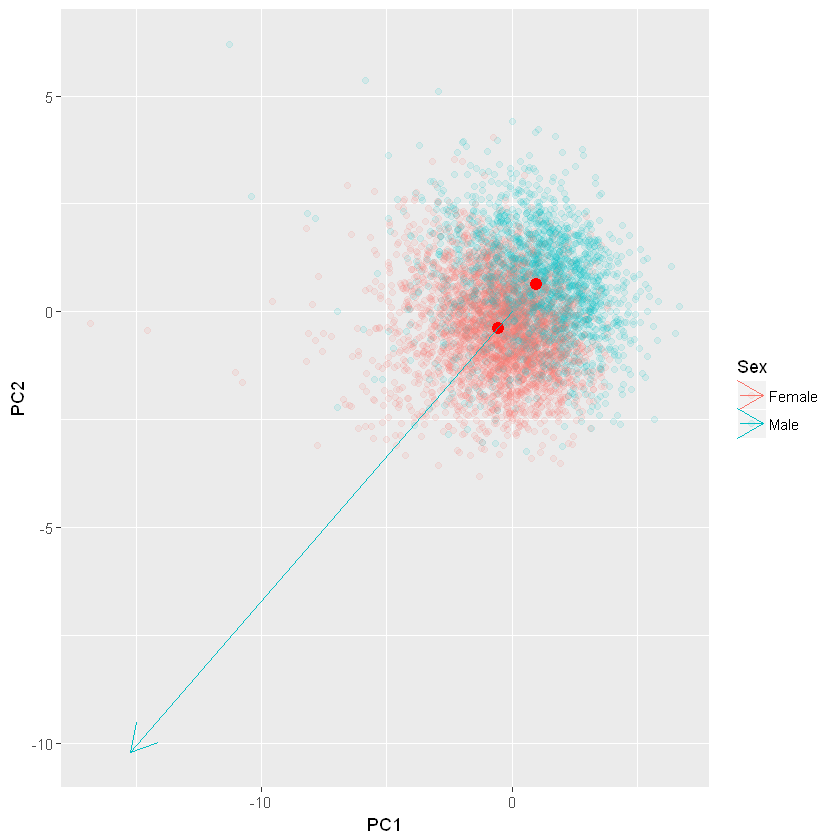

In [15]:
ggplot(coeffs, aes(PC1, PC2, colour=Sex)) + geom_point(alpha=0.1) + 
    geom_point(data = consensus[,1:2], aes(PC1, PC2), color="red", size=3) + 
    geom_segment(aes(x = 0, y = 0, xend = totalSD[1,1]*10, yend = totalSD[1,2]*10), arrow=arrow())

In [16]:
#Multivariate linear regression of height and sex on face
fit <- lm(as.matrix(coeffs[,6:ncol(coeffs)]) ~ coeffs$Sex + coeffs$Height)

In [17]:
summary(manova(fit), test="Hotelling-Lawley")
summary(manova(fit), test="Wilks")
summary(manova(fit), test="Roy")
summary(manova(fit), test="Pillai")

                Df Hotelling-Lawley approx F num Df den Df    Pr(>F)    
coeffs$Sex       1           3.4716  218.594     87   5478 < 2.2e-16 ***
coeffs$Height    1           0.1331    8.381     87   5478 < 2.2e-16 ***
Residuals     5564                                                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                Df   Wilks approx F num Df den Df    Pr(>F)    
coeffs$Sex       1 0.22363  218.594     87   5478 < 2.2e-16 ***
coeffs$Height    1 0.88253    8.381     87   5478 < 2.2e-16 ***
Residuals     5564                                             
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                Df    Roy approx F num Df den Df    Pr(>F)    
coeffs$Sex       1 3.4716  218.594     87   5478 < 2.2e-16 ***
coeffs$Height    1 0.1331    8.381     87   5478 < 2.2e-16 ***
Residuals     5564                                            
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                Df  Pillai approx F num Df den Df    Pr(>F)    
coeffs$Sex       1 0.77637  218.594     87   5478 < 2.2e-16 ***
coeffs$Height    1 0.11747    8.381     87   5478 < 2.2e-16 ***
Residuals     5564                                             
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [18]:
coef(fit)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87
(Intercept),-7.99785915,-2.30475072,2.86288108,0.400831446,0.372051140,1.342397967,0.0618685842,0.538351356,-0.599265401,-0.0366074157,...,0.0094079848,-0.0061225782,-0.018150374,-2.442793e-04,1.391806e-02,2.254865e-03,0.0407388871,0.0401369762,-1.024113e-03,-0.0286241051
coeffs$SexMale,0.91743410,0.86463441,-0.02315028,0.049532375,0.648698478,-0.042212917,-0.3016603530,-0.073084320,-0.233240944,0.1519334308,...,0.0062379572,0.0012687054,-0.001025131,-4.027706e-03,2.969042e-03,-2.838850e-03,0.0143337156,0.0109411642,-1.524876e-03,0.0023048804
coeffs$Height,0.04532047,0.01165051,-0.01695155,-0.002425523,-0.003739819,-0.007788091,0.0002914892,-0.003058677,0.004094624,-0.0001342196,...,-0.0000679914,0.0000328969,0.000108359,1.151474e-05,-8.715757e-05,-8.474943e-06,-0.0002727809,-0.0002614551,9.659266e-06,0.0001652065


In [19]:
allometricSD     <- coef(fit)[3,] * (mean(coeffs[coeffs$Sex == 'Female',4]) - mean(coeffs[coeffs$Sex == 'Male',4]))
non.allometricSD <- as.numeric(totalSD) - allometricSD

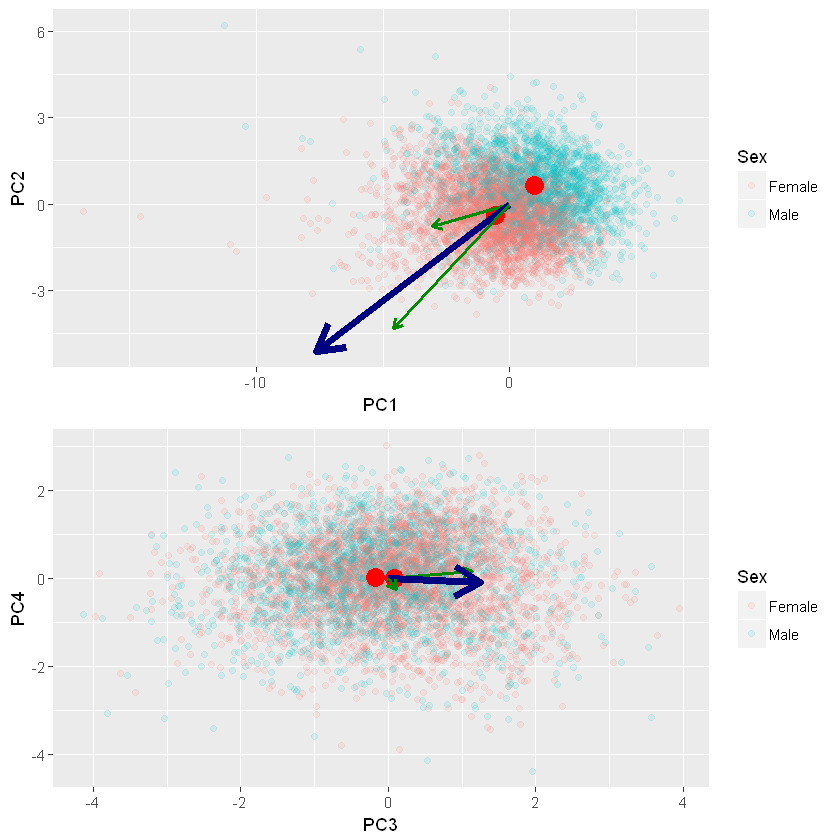

In [20]:
p1 = ggplot(coeffs, aes(PC1, PC2, colour=Sex)) + geom_point(alpha=0.1) +
    geom_point(data = consensus[,1:2], aes(PC1, PC2), color="red", size=5) + 
    geom_segment(aes(x = 0, y = 0, xend = allometricSD[1]*5, yend = allometricSD[2]*5), 
                 arrow = arrow(length = unit(0.03, "npc")), size = 1, color="green4") + 
    geom_segment(aes(x = 0, y = 0, xend = totalSD[1,1]*5, yend = totalSD[1,2]*5), 
                 arrow = arrow(), size = 2, color = "navy") + 
    geom_segment(aes(x = 0, y = 0, xend = non.allometricSD[1]*5, yend = non.allometricSD[2]*5), 
                 arrow = arrow(length = unit(0.03, "npc")), size = 1, color="green4")

p2 = ggplot(coeffs, aes(PC3, PC4, colour=Sex)) + geom_point(alpha=0.1) +
    geom_point(data = consensus[,3:4], aes(PC3, PC4), color="red", size=5) + 
    geom_segment(aes(x = 0, y = 0, xend = allometricSD[3]*5, yend = allometricSD[4]*5), 
                 arrow = arrow(length = unit(0.03, "npc")), size = 1, color="green4") + 
    geom_segment(aes(x = 0, y = 0, xend = totalSD[1,3]*5, yend = totalSD[1,4]*5), 
                 arrow = arrow(), size = 2, color = "navy") + 
    geom_segment(aes(x = 0, y = 0, xend = non.allometricSD[3]*5, yend = non.allometricSD[4]*5), 
                 arrow = arrow(length = unit(0.03, "npc")), size = 1, color="green4")

grid.arrange(p1,p2)

# Face surfaces

Creating matrix of face coordinates back from PCA

In [27]:
coords <- as.matrix(coeffs[,6:ncol(coeffs)]) %*% t(as.matrix(eigenvec))
head(coords)
dim(coords)

0.048235012,0.009327681,0.008162004,0.048695134,0.009712502,0.008701070,0.049241594,0.010520438,0.009362233,0.0495208315,...,0.005802779,-0.055503748,0.0121346488,0.005405787,-0.055014900,0.0099982813,0.005687066,-0.054739295,0.0091016608,0.005561467
0.057902192,0.002988353,0.013308798,0.059935044,0.003014860,0.013907974,0.063181236,0.002891516,0.014613717,0.0661492790,...,0.023899677,-0.064546934,0.0077346714,0.023341597,-0.061168586,0.0059109541,0.022772634,-0.059271918,0.0049450827,0.022339370
-0.002014713,0.012556230,0.003070116,-0.001468997,0.013283830,0.003651175,-0.001028948,0.014655635,0.004498617,-0.0006746411,...,0.008328083,0.004037372,0.0059314979,0.008638322,0.003444496,0.0048620555,0.008724303,0.003485233,0.0044255898,0.008648971
0.057471829,-0.015525898,0.021878577,0.058146840,-0.015160092,0.021659323,0.059356183,-0.014870649,0.021103792,0.0603373286,...,0.013009112,-0.058641391,-0.0286885770,0.013223505,-0.057748287,-0.0288087125,0.013853279,-0.057246109,-0.0290377491,0.013910219
-0.033448314,-0.008223250,-0.039550537,-0.033791201,-0.008939076,-0.039462521,-0.033598794,-0.009690368,-0.039496922,-0.0327621359,...,-0.050393241,0.025048108,-0.0007567339,-0.050884065,0.027027142,-0.0007435756,-0.050644770,0.027771491,-0.0005244326,-0.050818014
0.049532505,-0.006775646,0.017569085,0.048501562,-0.006739372,0.017319579,0.047034854,-0.006453757,0.016521810,0.0455439847,...,0.018549682,-0.046168491,0.0096383803,0.017922641,-0.047226775,0.0094210928,0.017746060,-0.048071387,0.0093937290,0.017164141


[1]  5939 20370

In [30]:
face1 <- matrix(coords[1, ], ncol=3, byrow=T)
head(face1)

0.04823501,0.009327681,0.008162004
0.04869513,0.009712502,0.008701070
0.04924159,0.010520438,0.009362233
0.04952083,0.011293843,0.010379698
0.04794019,0.008213717,0.008687895
0.04724383,0.006959264,0.007955455


In [44]:
myPlot <- plot_ly() %>% 
  add_trace(data = face1,  x=face1[,1], y=face1[,2], z=face1[,3], type="mesh3d" ) 

embed_notebook(myPlot)

In [43]:
class(myPlot)
str(IRdisplay::prepare_mimebundle(myPlot))

[1] "plotly"     "htmlwidget"

ERROR: Error: evaluation nested too deeply: infinite recursion / options(expressions=)?


In [46]:
embed_notebook(myPlot)

In [47]:
IRdisplay::publish_mimebundle(myPlot)

ERROR: Error: No method asJSON S3 class: htmlwidget
